**Homework #1**

- Apply the best cut you can and calculate the TPR,FPR and accuracy of that cut.
- Do the same analysis with Decision Tree Algorithm and get TPR,FPR and accuracy of that cut.
- Compare Receiver Operating Characteristic Curves of Cut Base and Decision Tree result

In [45]:
import numpy as np

# Define a signal function that generates random values based on a function
def signal_function(x):
    min_val, max_val = np.sin(x) + x * np.sin(x), 20
        # Define circular region parameters
    center_x, center_y = 0, 10  # Center coordinates
    radius = 3  # Radius
    y_test = np.random.uniform(low=min_val, high=max_val, size=(1,))
    # Check if the point (x, y) is outside the circular region
    if (x - center_x)**2 + (y_test - center_y)**2 > radius**2:
        return y_test
    else:
        return np.random.uniform(low=15, high=20, size=(1,))


# Define a background function that generates random values based on a function
def background_function(x):
    min_val, max_val = np.sin(x) + x * np.sin(x), 20
        # Define circular region parameters
    center_x, center_y = 0, 10  # Center coordinates
    radius = 4  # Radius
    y_test = np.random.uniform(low=min_val, high=max_val, size=(1,))
    if (x - center_x)**2 + (y_test - center_y)**2 < radius**2:
        return y_test
    else:
        min_val, max_val = -20, np.sin(x) + x * np.sin(x)  
        return np.random.uniform(low=min_val, high=max_val, size=(1,))

# Generate synthetic data for signal and background
data_size = 3000

# Generate signal data
signal_x = np.random.uniform(low=-11.0, high=10.0, size=(data_size,))
signal_y = np.zeros(data_size, dtype=float)
signal_label = np.ones(data_size)
for i in range(len(signal_x)):
    signal_y[i] = signal_function(signal_x[i])
signal_data = np.column_stack((signal_x, signal_y, signal_label))

# Generate background data
background_x = np.random.uniform(low=-11.0, high=10.0, size=(data_size,))
background_y = np.zeros(data_size, dtype=float)
background_label = np.zeros(data_size)
for i in range(len(background_x)):
    background_y[i] = background_function(background_x[i])
background_data = np.column_stack((background_x, background_y, background_label))

/var/folders/h1/s46zdkz905j6q1vd7vxjj6v40000gn/T/ipykernel_22236/3141764092.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  signal_y[i] = signal_function(signal_x[i])
/var/folders/h1/s46zdkz905j6q1vd7vxjj6v40000gn/T/ipykernel_22236/3141764092.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  background_y[i] = background_function(background_x[i])


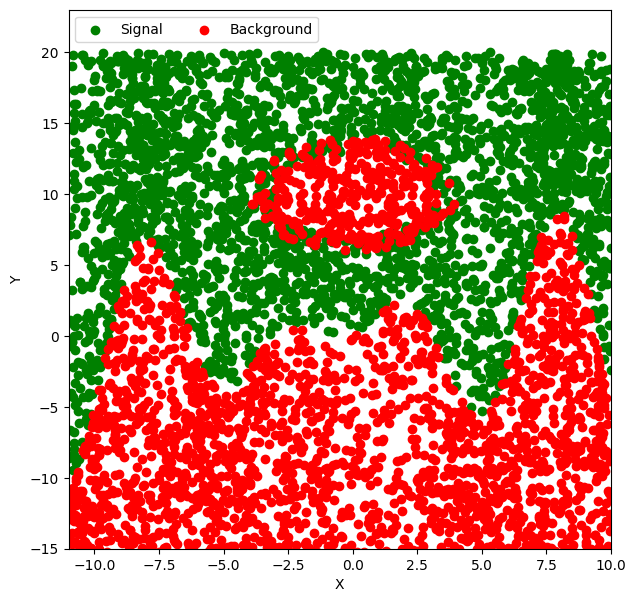

In [46]:
import matplotlib.pyplot as plt

# Plot the actual data points along with the actual function and estimated line
plt.figure(1, figsize=(7, 7))
plt.scatter(signal_data[:, 0], signal_data[:, 1], color='green', label="Signal")
plt.scatter(background_data[:, 0], background_data[:, 1], color='red', label="Background")
plt.legend(loc="upper left", ncol=4)
plt.xlim(-11, 10)
plt.ylim(-15, 23)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()